

# Investigate and analyze a Dataset TMDB 5000 Movie.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

>This project is about analyze TMDb movie data.  
The dataset
 contains information about more than 9,000 movies
collected from the database (TMDb),
including:user ratings,and revenue.
* Certian columns, like vote_average and
      vote_Count where it contains the people votes in
      particular movie.
* there are some deleted columns listed below where they are not need it in the analysis process:
      1- homepage
      2- genres
      3- production_companies
      4- release_date
      5- cast
      6- revenue_adj
      7- budget_adj
> <h3>The questions will be ask in this project are:</h3>
<ol>
    <li>
 Is the increases of vote average lead to make the movie  more popular?</li>
    <li>Is there a diffirence between movies that have more vote counts whether older moives or newer movies based on their release year?
</li>
</ol>
> in this project I will walk throughout a process where first I will show to you the data and information about data 
 e.g(number of samples, number of columns, unique values,ect)
 then I will clean the data by geting rid of null values and remove duplicates if any.
 after that there are two questions will be answer using graphs using python packages.
 
>tools used in this project and resourses: 
* python packages:numpy, pandas, matplotlib and seaborn.
* jupyter notebook
* data for movies, which from the website <a href='https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv.'>Kaggle<a/>
     

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
% matplotlib inline




In [63]:
def remove_columns(list,file):
    file.drop(list,axis=1,inplace=True)

><strong>this function will be used to remove particular columns where we provied a list of columns and a file of csv</strong>

<a id='wrangling'></a>
## Data Wrangling

>  In this section I will clean the data and show the data in different prespective


### General Properties
>first lets load the file and see the contnet of it coloumns and rows

In [64]:

df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>As shown above from the table we have the following coloumns:
id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, overview, runtime, genres,	production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj

In [65]:
df.shape

(10866, 21)

In [66]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

><strong>As shown above<strong> a describtion of the data where it shows the following values:
<ol>
    <li>count</li>
     <li>mean</li>
     <li>std</li>
    <li>min</li>
     <li>25</li>
     <li>50%</li>
    <li>75%</li>
    <li>max</li>
</ol>
<p>these values are calculated for each coloumn</p>

In [68]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [69]:
df.nunique().sum()

119205

> as shown Above by displaying the coloumns that has  <strong>unique values</strong> which are: 
* id which has 10865
* popularity which has 10814 unique values
* budget which has 557 unique values
* revenue which has 4702 unique values
* original_title which has 10571 unique values
* director which has 5068 unique values
* tagline which has 7998 unique values
* keywords which has 8805 unique values
* overview which has 10848 unique values
* runtime which has 247 unique values
* vote_count which has 1289 unique values
* vote_average which has 72 unique values
* release_year which has 56 unique values

### AS the data shown above it needs to be cleaned in the following process:
* remove unnecessary columns
* discovring number of null values and where they are 
* remove in rows has null values
* remove duplications
* fixing data types
<br><strong>total unique values is:119205</strong>





><h1>starting with removing <strong>remove unnecessary columns</strong>
</h1>

In [70]:
## droping the columns 
col = ['homepage','genres','production_companies','release_date','cast','revenue_adj','budget_adj','imdb_id']
remove_columns(col,df)


In [71]:
df.head(1)

,id,popularity,budget,revenue,original_title,director,tagline,keywords,overview,runtime,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,5562,6.5,2015


> <h2>As shown above</h2>
 <p>I have removed the columns that not needed in this project which they are:</p>
     <ol>
    <li>homepage</li>
    <li>genres</li>
    <li>production_companies</li>
    <li>release_date</li>
    <li>cast</li>
    <li>revenue_adj</li>
    <li>budget_adj</li>
    <li>imdb_id</li>
</ol>

# Checking for null values where it located and how many in the dataset:

In [72]:
df.isnull().sum()

id                   0
popularity           0
budget               0
revenue              0
original_title       0
director            44
tagline           2824
keywords          1493
overview             4
runtime              0
vote_count           0
vote_average         0
release_year         0
dtype: int64

><h3>Now we will remove the nulls values</h3>
<p>
    the reason to remove the null values is for avoiding errors appear while anlayzing them.
</p>

In [73]:
##filing the nulls 
df.dropna(inplace=True)

In [74]:
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
tagline           0
keywords          0
overview          0
runtime           0
vote_count        0
vote_average      0
release_year      0
dtype: int64

>Checking if there is nulls again as shown above we have zeros nulls now

# getting number of duplicates and removing them. 
<p>
the advantage of removing duplicates is to remove getting wrong anlaysisand prevent constant values in the anlysis where it will be hard to notice the change in the analysis
</p>

In [75]:
df.duplicated().sum()

1

In [76]:
df.drop_duplicates(inplace=True)

In [77]:
df.shape

(7318, 13)

><h1>Fixing data types</h1>
<p>lets explore the data types first to see if there is something to fix</p>

In [92]:
df.dtypes

id                  int64
popularity        float64
budget            float64
revenue             int64
original_title     object
director           object
tagline            object
keywords           object
overview           object
runtime           float64
vote_count          int64
vote_average      float64
release_year        int64
dtype: object

> let us change  the column <strong>budget ,</strong><strong>runtime</strong> to folat because that make snense to have it as  float

In [93]:
df['budget'] = df['budget'].astype(float)
df['runtime'] = df['runtime'].astype(float)



><strong>Making sure that the data type changed</strong>

In [94]:
df.dtypes

id                  int64
popularity        float64
budget            float64
revenue             int64
original_title     object
director           object
tagline            object
keywords           object
overview           object
runtime           float64
vote_count          int64
vote_average      float64
release_year        int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> In this section two questions were given about the data set below and it will be answered using grpahs
and taking the answer based on the graph.

### Q1- Is the increases of vote average lead to make the movie  more popular?
> <p>Firstly We would divie the vote average into two categoires as:</p>
    <ol>
    <li>
     movie has high counts votes average which means it is above the average
    </li>
    <li>
     moive has low counts votes average which means it is below the average
    </li>
    </ol>



In [95]:
# Use this, and more code cells, to explore your data. Don't forget to add
# Markdown cells to document your observations and findings.
#fist getting the mean value of the vote average to see what is the average
df['vote_average'].mean()
low_vote = df.query('vote_average < 5.97 ')
high_vote = df.query('vote_average > 5.97 ')




> <h1>Exploring the low_vote and high vote data using hist graph</h1>

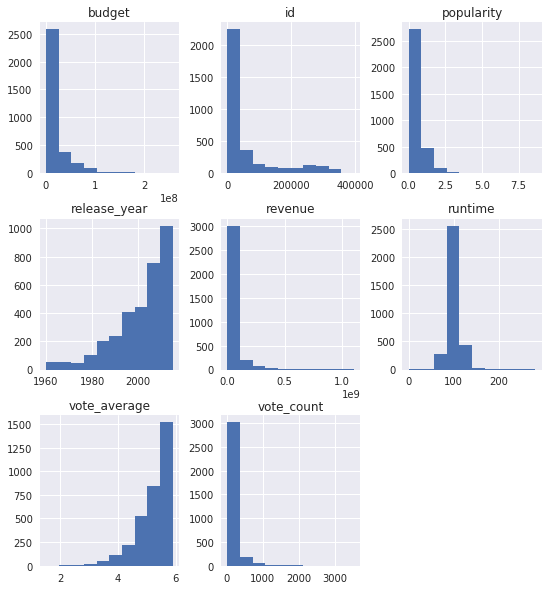

In [82]:
low_vote.hist(figsize=(9,10));

><p>As we see from the graph it is obvoius that the low_vote dataset has many movies that has low number of vote count</p>

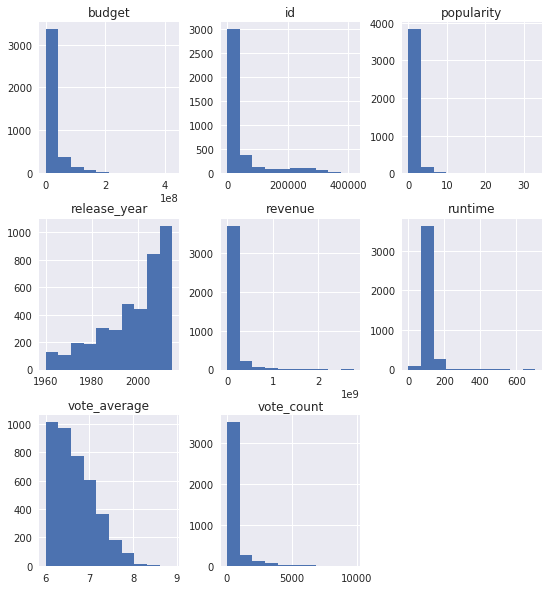

In [83]:
high_vote.hist(figsize=(9,10));

><p>As we see from the graph it is obvoius that the low_vote dataset has many movies that has high number of vote count and average</p>

>As shown above we have did the following steps:
  <ol>
    <li>
        we got the mean value average for the average voting of the moives
    </li>
    <li>
        based on the value we got of the mean we will compare and divied the movies into two diffierents categiories
    </li>
    <li>
       the values low_vote is considered below the average
        and the hihg_vote is  considered above the average
    </li>
</ol>
   
 
 f

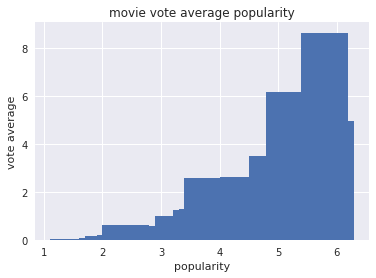

In [84]:
##now I will create a graph for each movie shows his pop
pop = low_vote['popularity']
vot = low_vote['vote_average']

plt.bar(vot,pop);
plt.title('movie vote average popularity');
plt.ylabel('vote average');
plt.xlabel('popularity');

# Answer:
><ul><li>  <p>Answer for the question :<br>
             <strong>Yes</strong>, as the grpahs shows the moives that have lower vote average it is not popular among the people
            on the other hand the movies that has higher average vote are more popular
            which make sense, for example from the grpah movies have popularity rate of 2 
            have average vote of less than one.
            <br>Finally as <strong>we notice as long as we got more average votes the movie will be popular</strong>.
    </p></li>
      </ul>

### Q2- Is there a diffirence between movies that have more vote counts whether older moives or newer movies based on their release year?

><strong>two kinds of graphs will be used to see the data from diffirent perspective</strong>

In [85]:
df['release_year'].mean()

old_moive = df.query('release_year < 2001')
new_moive = df.query('release_year > 2001')

old_years = old_moive['release_year']
new_years = new_moive['release_year']
vot_old = old_moive['vote_count']
vot_new = new_moive['vote_count']


><h1>Exploring old_move, new_movie using hist graph</h1>

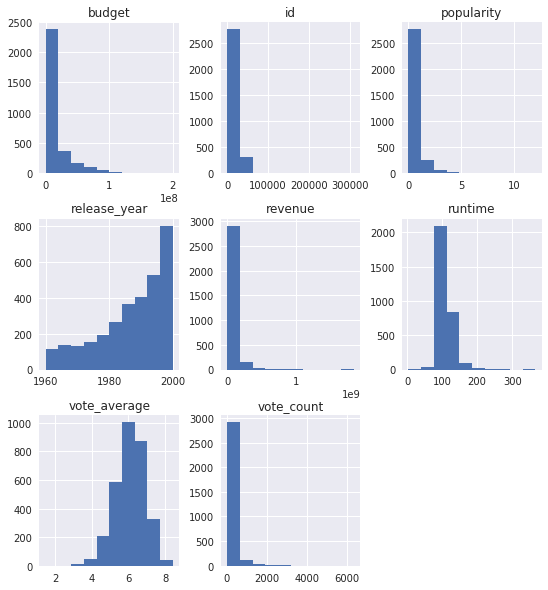

In [86]:
old_moive.hist(figsize=(9,10));

><p>As we see from the grpah of new_movie dataset we can see that there is less than 600 movie which has a vote average almost 5</p>

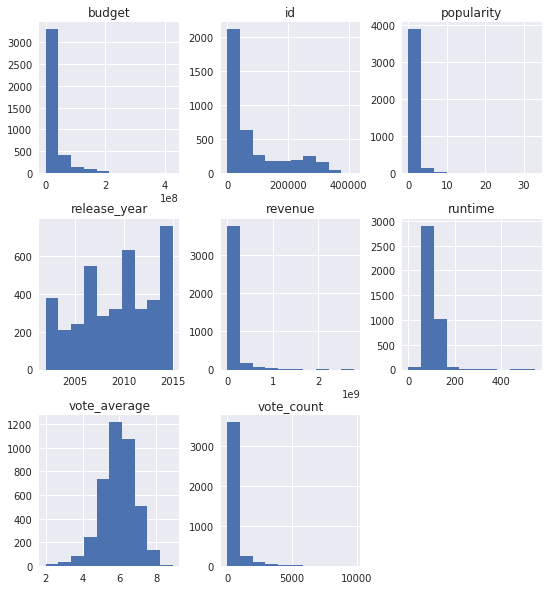

In [87]:
new_moive.hist(figsize=(9,10));

><p>As we see from the grpah of new_movie dataset we can see that there is more than 1000 movie which has a vote average of 6</p>

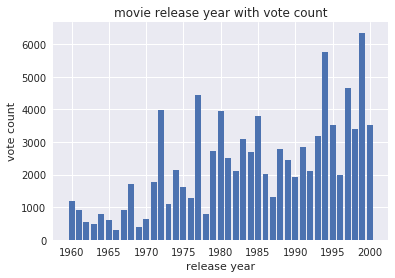

In [88]:
plt.bar(old_years,vot_old);
plt.title('movie release year with vote count');
plt.ylabel('vote count');
plt.xlabel('release year');

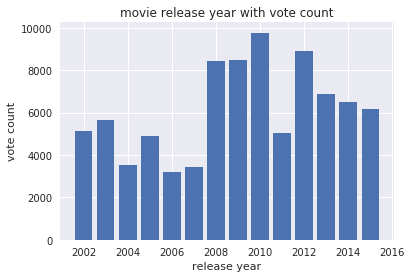

In [89]:
plt.bar(new_years,vot_new);
plt.title('movie release year with vote count');
plt.ylabel('vote count');
plt.xlabel('release year');

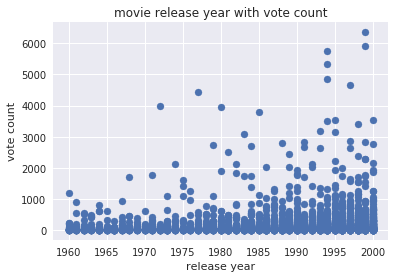

In [90]:
plt.scatter(x=old_years,y=vot_old);
plt.title('movie release year with vote count');
plt.ylabel('vote count');
plt.xlabel('release year');

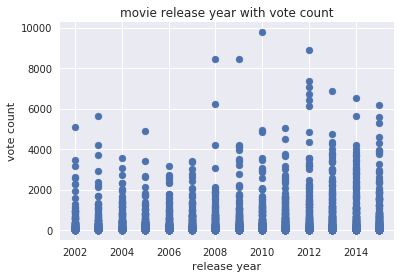

In [91]:
plt.scatter(x=new_years,y=vot_new);
plt.title('movie release year with vote count');
plt.ylabel('vote count');
plt.xlabel('release year');

## Answer :

><ul>
    <li>
                <p>Answer for second question :<br>
                <strong>Yes</strong>, there is a diffiernce between the movies vote count but not based on thier release years
       because the time do not imply that as we got to a new year it will increase the vote count from both graphs scatter and bar. 
       it keeps changing depeneds on the factors like: actors performance , directors thinking, the trend of the year.<br>
       As a result the relase year <strong>do not impact </strong>the vote count. 
        </p> 
           
   </li>
   </ul>

<a id='conclusions'></a>
## Conclusions
> <strong>in conclusion</strong> in this project we have analyzed a <strong>TMDB 5000 Movie</strong>
    where we study the data and ask question based on the dataset, after that we cleaned the dataset by removing un used   columns and removing null values. Then we did some hist, bar, scatter graph to demonstrate the dataset in better way to answer the questions.
    
>the dataset size is perfect to analyze where we have more than 6000 rows which that lead to more real analysis because we have a large set of data.

><h3>Answers summary:</h3>
 <ul>
    <li>first question:as long as we got more average votes the movie will be popular</li>
    <li>the relase year do not impact the vote count.</li>
</ul>

   

    





## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])